# Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

-crim
per capita crime rate by town.

-zn
proportion of residential land zoned for lots over 25,000 sq.ft.

-indus
proportion of non-retail business acres per town.

-chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

-nox
nitrogen oxides concentration (parts per 10 million).

-rm
average number of rooms per dwelling.

-age
proportion of owner-occupied units built prior to 1940.

-dis
weighted mean of distances to five Boston employment centres.

-rad
index of accessibility to radial highways.

-tax
full-value property-tax rate per \$10,000.

-ptratio
pupil-teacher ratio by town.

-black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

-lstat
lower status of the population (percent).

-medv
median value of owner-occupied homes in \$1000s.

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

Since the target has continous datatype so we use 
# Linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
# load the data
df = pd.read_csv('data/Boston.csv',sep=",")
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# Show the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
# show the data head 
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# show the data tail 
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
#Missing value checking
print("To check if any colun has null values :")
print(df.isnull().sum())

To check if any colun has null values :
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


# Insight:
However, there are no missing values in this dataset as shown above.

# Exploratory Data Analysis

C:\Users\RMV\anaconda3b\envs\hacktiv8-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


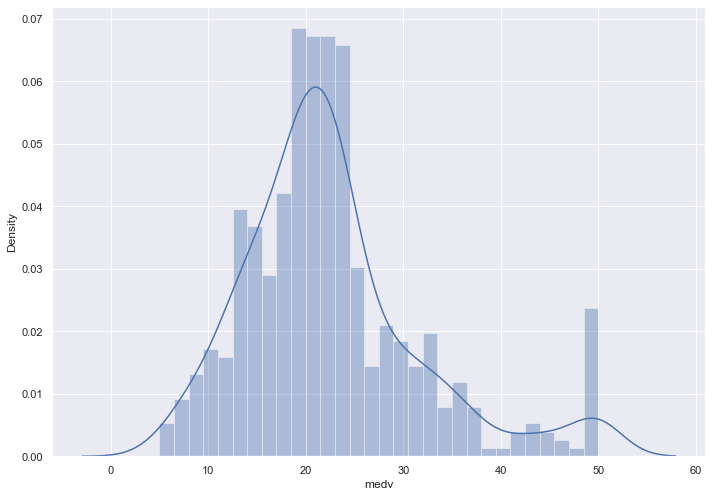

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['medv'], bins=30)
plt.show()

# Insight 
We see that the values of MEDV are distributed normally with few outliers.

# Correlation

Next, we create a correlation matrix that measures the
linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn 
library to plot the correlation matrix

<AxesSubplot:>

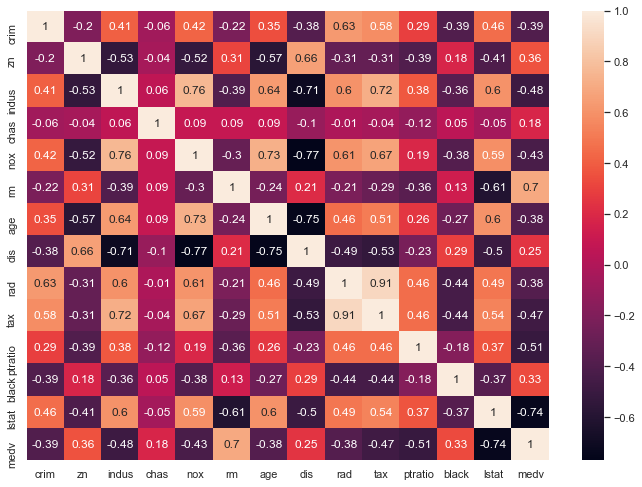

In [8]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Insight:
- The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.
To enter a linear regression model, we choose RM (0,7) and LSTAT  (-0,74) that has high correlation with MEDV. 
- Then, RAD-TAX  and DIS-AGE have correlation 0,91  and -0,75. It means those paires of features are strongly correlated to each other. So, we shoudn't pick  these features to enter training model. 

In [9]:
Delete_var = ['rad','tax','dis','age']
df.drop(Delete_var, axis=1, inplace=True)

In [10]:
df

,crim,zn,indus,chas,nox,rm,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,21.0,393.45,6.48,22.0


We got RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

In [11]:
plt.figure(figsize=(20, 5))

X = []
y = df['medv']

for i, col in enumerate(X):
    plt.subplot(1, len(X) , i+1)
    x = df[col]
    y = y
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

<Figure size 1440x360 with 0 Axes>

# Insight :
- The prices increase as the value of RM increases linearly (positive). There are few outliers and maximum value is 50.
- The prices tend to decrease with an increase in LSTAT (negative). Though it doesn’t look to be following exactly a linear line.

In [12]:
X = df.drop(columns=['crim','zn','indus','chas','nox','ptratio','black'])
X
Y=df['medv']
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [13]:
# Check the unique of variables
df.apply(lambda x : len(x.unique()))

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
# model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))


The model performance for training set
--------------------------------------
RMSE is 2.065075105317169e-15


The model performance for testing set
--------------------------------------
RMSE is 2.060564925789878e-15
